# Simple Autoencoder Experiments

Spencer Bertsch <br>
ENGG 192 <br> 
Dartmouth College - WInter 2019

This notebook outlines a simple autoencoder in Keras which is used ot encode the MNIST dataset in an attempt to store the features in a lower dimensional representation than the original. Different network parameters are optimized to reduce testing loss and improve the decoded images. 

### Sources: 

The main source for this notebook was [Francois Challet](https://twitter.com/fchollet) and his post, [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html). 

In [147]:
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras.models import Sequential
import IPython as IP

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


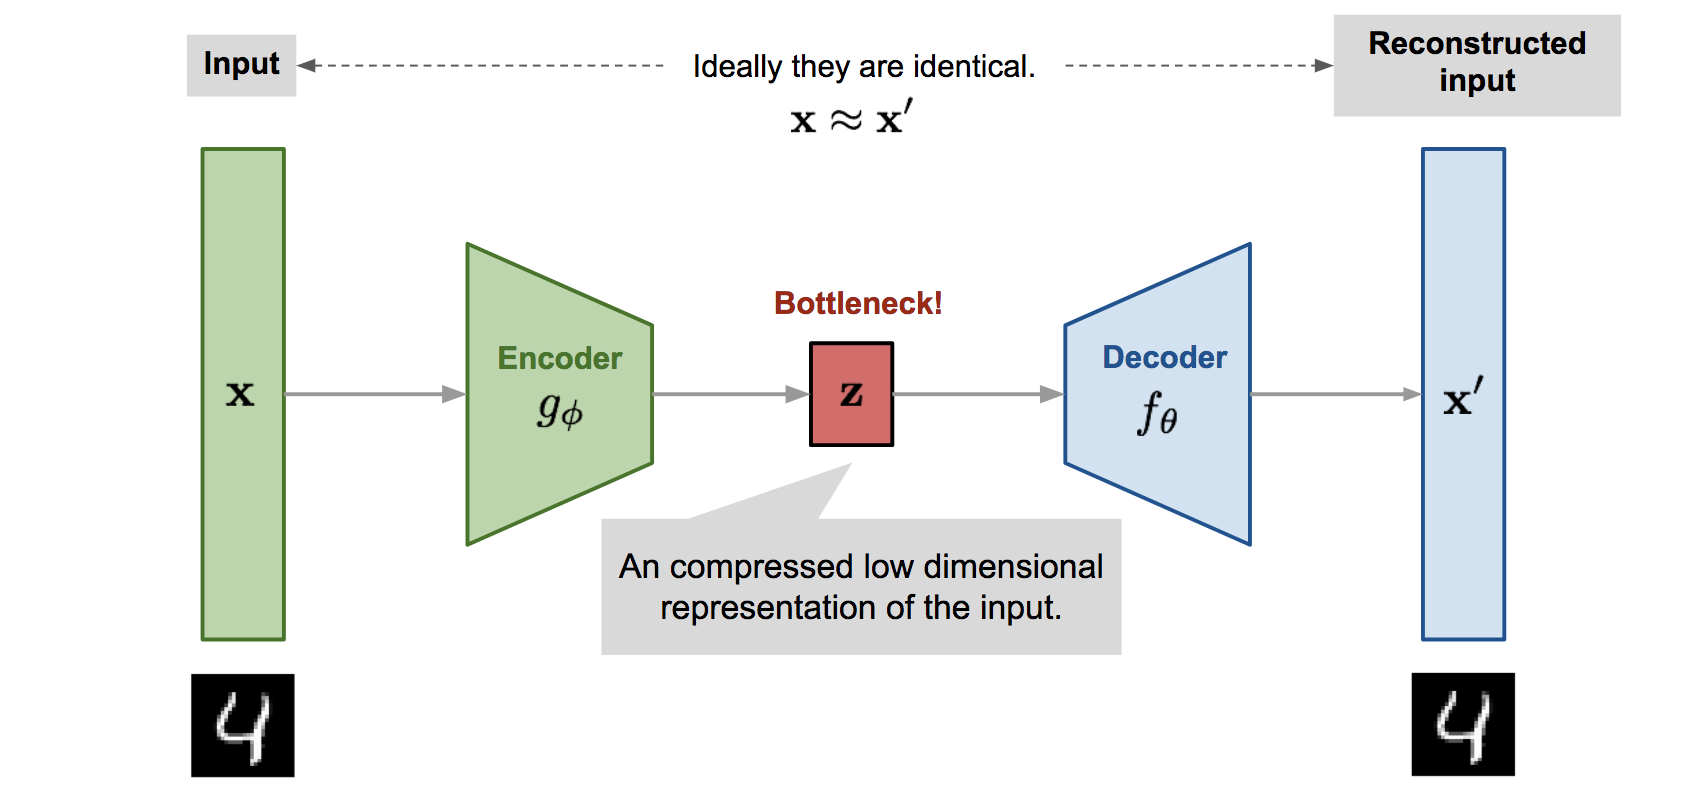

In [148]:
IP.display.Image('https://lilianweng.github.io/lil-log/assets/images/autoencoder-architecture.png')

We can see that the ideal autoencoder finds the parameters which can return the reduced dimansional representation of the input back to its original form with no loss. In other words, $x = x'$

In [149]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [150]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [151]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
from keras.datasets import mnist
import numpy as np
from keras import metrics
(x_train, _), (x_test, _) = mnist.load_data()

In [153]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [154]:
history = autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 2s 39us/step - loss: 0.3606 - acc: 0.7531 - val_loss: 0.2717 - val_acc: 0.7950
Epoch 2/70
60000/60000 [==============================] - 2s 31us/step - loss: 0.2652 - acc: 0.7974 - val_loss: 0.2551 - val_acc: 0.7971
Epoch 3/70
60000/60000 [==============================] - 2s 31us/step - loss: 0.2454 - acc: 0.7972 - val_loss: 0.2333 - val_acc: 0.7954
Epoch 4/70
60000/60000 [==============================] - 2s 29us/step - loss: 0.2261 - acc: 0.7966 - val_loss: 0.2168 - val_acc: 0.7963
Epoch 5/70
60000/60000 [==============================] - 2s 36us/step - loss: 0.2119 - acc: 0.7975 - val_loss: 0.2043 - val_acc: 0.7977
Epoch 6/70
60000/60000 [==============================] 

In [155]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

And we're done! We now have our original images and the results of the encoding-decoding process in the autoencoder. Let's look at how our model performed:

In [156]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [157]:
# - BERTSCH - 
def Plotter(loss, epochs):
    %matplotlib inline
    x = range(1)
    y = range(1)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)

    plt.plot(loss, color='darkorange', label=('Loss achieved after' + str(epochs) + 'epochs')) 
    plt.legend(loc='upper left');
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Model Loss')
    plt.grid()

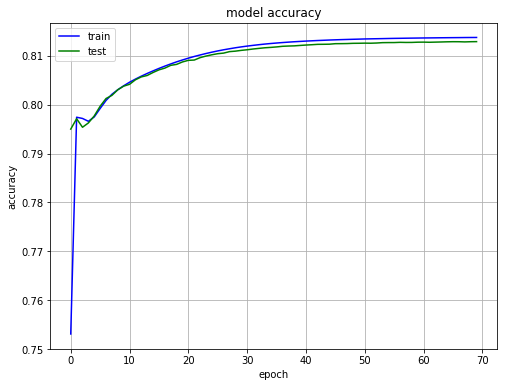

In [158]:
# summarize history for accuracy
%matplotlib inline
x = range(1)
y = range(1)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

plt.plot(history.history['acc'], 'blue')
plt.plot(history.history['val_acc'], 'green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()

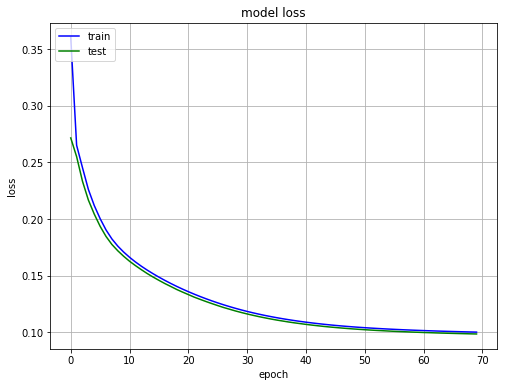

In [159]:
# summarize history for loss
%matplotlib inline
x = range(1)
y = range(1)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()

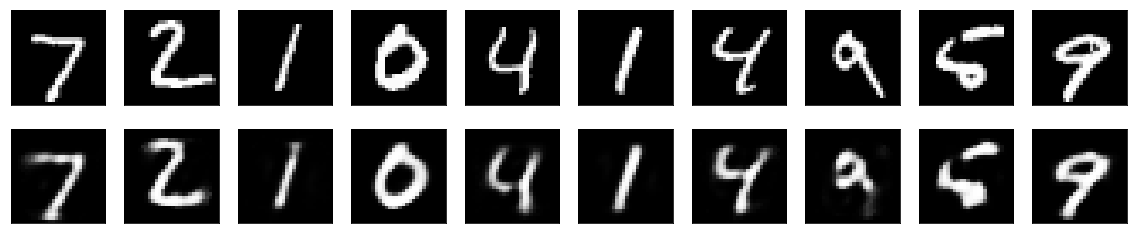

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

We can see that although we used a shallow network as our model, we were able to achieve an accuracy of 81.3% and reach an emperically satisfying solution with nice reconstruction of the origianl handritten digits. Further work could involve optimization of the network to reduce loss even further, or reducing the dimensionality of the autoencoder's bottleneck to make the task more difficult. 